# Load BSON files

In [677]:
import os
import numpy as np
import bson

def getBsonFiles(DIR):
    files = os.listdir(DIR)
    bson_files = []

    for f in files:
        if ".bson" in f:
            bson_files.append(f)

    print(bson_files)
    return bson_files

In [678]:
DATA_DIR = os.getcwd() + "/data/fddg-db13/fddg"

In [679]:
bson_files = getBsonFiles(DATA_DIR)

['users.bson', 'metas.bson', 'chunks.bson']


In [680]:
bson_data = {}

for b in bson_files:
    with open(DATA_DIR + "/" + b, "rb") as f:
        bson_data[b] = bson.decode_all(f.read())

# Load all BSON data into class objects

In [681]:
class Meta:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.subject_id = json_doc["subject_id"]
        self.phone_placement = json_doc["phone_placement"]
        self.recording_duration = json_doc["recording_duration"]
        self.chunk_ids = json_doc["chunk_ids"]
        
class Chunk:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.recording_id = json_doc["recording_id"]
        self.chunk_index = json_doc["chunk_index"]
        self.labels = json_doc["labels"]
        self.p_ecg = json_doc["p_ecg"]
        self.p_hr = json_doc["p_hr"]
        self.p_contact = json_doc["p_contact"]
        self.p_acc_x = json_doc["p_acc_x"]
        self.p_acc_y = json_doc["p_acc_y"]
        self.p_acc_z = json_doc["p_acc_z"]
        self.acc_x = json_doc["acc_x"]
        self.acc_y = json_doc["acc_y"]
        self.acc_z = json_doc["acc_z"]
        self.gyr_x = json_doc["gyr_x"]
        self.gyr_y = json_doc["gyr_y"]
        self.gyr_z = json_doc["gyr_z"]
        self.gra_x = json_doc["gra_x"]
        self.gra_y = json_doc["gra_y"]
        self.gra_z = json_doc["gra_z"]
        self.mag_x = json_doc["mag_x"]
        self.mag_y = json_doc["mag_y"]
        self.mag_z = json_doc["mag_z"]
        self.att_roll = json_doc["att_roll"]
        self.att_pitch = json_doc["att_pitch"]
        self.att_yaw = json_doc["att_yaw"]
        self.delta_heading = json_doc["delta_heading"]
        
class User:
    def __init__(self, json_doc):
        self.subject_id = json_doc["subject_id"]
        self.name = json_doc["name"]
        self.yob = json_doc["yob"]
        self.height = json_doc["height"]
        self.weight = json_doc["weight"]
        self.is_female = json_doc["is_female"]
        self.medical_conditions = json_doc["medical_conditions"]

In [682]:
metas = []
rec_chunks = {}
chunks = {}
users = {}

In [683]:
# Metas
for doc in bson_data[bson_files[1]]:
    meta = Meta(doc)
    metas.append(meta)
    
# Chunks
for doc in bson_data[bson_files[2]]:
    chunk = Chunk(doc)
    print(chunk._id)
    print(chunk.recording_id)
    print()
    
    if chunk.recording_id in rec_chunks.keys():
        rec_chunks[chunk.recording_id].append(chunk)
    else:
        rec_chunks[chunk.recording_id] = [chunk]
    
    chunks[chunk._id] = chunk

# Users
for doc in bson_data[bson_files[0]]:
    user = User(doc)
    users[user.subject_id] = user

D1118BCC-897D-4E11-BBF1-D6FF914CB35A
6839A964-F81C-4CEC-8B98-4118A4B007F9

9B06EF08-83B2-4B1A-813E-48CACF07EF5B
6839A964-F81C-4CEC-8B98-4118A4B007F9

66A84428-57AE-43BB-B439-2FD854A0E487
039D44F4-F64C-4F32-9035-13C806928AF6

4C78A869-F73A-4BB5-88EE-80BCB2A505D2
849B275E-A5B1-4A03-A374-CCFA44F34960

9907A30F-1AB7-4AFF-8064-FDEB6E4ABD33
849B275E-A5B1-4A03-A374-CCFA44F34960

EE1669B4-8195-491A-84B6-1D45B0DAB224
849B275E-A5B1-4A03-A374-CCFA44F34960

8C9ED477-F3F0-451E-88D6-F4BAE2F17DA6
849B275E-A5B1-4A03-A374-CCFA44F34960

1D888923-C1ED-4EBE-AFC7-A4F729FE1AD6
849B275E-A5B1-4A03-A374-CCFA44F34960

4FD83C88-4249-4270-8140-D982334A011C
849B275E-A5B1-4A03-A374-CCFA44F34960

E2CF48D6-9300-4846-BBF2-976D809C82BD
AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04

659F2818-494C-4208-97B8-2C311D3CAEF2
AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04

9592013C-FE89-4149-9948-9EA4ED9DFA9F
AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04

F6278892-65EE-4B62-92A5-F4B6C792F3CE
AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04

D6F7FE59-AFCE-426B-AA3F-E

In [684]:
for c in rec_chunks["EBDF23BC-1923-4240-9AA4-0222E0A44161"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print(len(c.p_hr))
    print()

KeyError: 'EBDF23BC-1923-4240-9AA4-0222E0A44161'

In [685]:
for c in rec_chunks["3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print(len(c.p_hr))
    print()

KeyError: '3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED'

# Merge all chunks and meta data into a single object for each recording

In [690]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_contact = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        print(self._id)
        r_chunks = rec_chunks[self._id]
        for c in r_chunks:
            print(c._id)
        print()
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(1,len(r_chunks)-1):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_contact += chunk.p_contact
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading

            print(len(chunk.labels))
            print(len(chunk.p_ecg))
            print(len(chunk.p_hr))
            print(len(chunk.p_acc_x))
            print(len(chunk.p_acc_y))
            print(len(chunk.p_acc_z))
            print(len(chunk.p_contact))
            print(len(chunk.acc_x))
            print(len(chunk.acc_y))
            print(len(chunk.acc_z))
            print(len(chunk.gyr_x))
            print(len(chunk.gyr_y))
            print(len(chunk.gyr_z))
            print(len(chunk.gra_x))
            print(len(chunk.gra_y))
            print(len(chunk.gra_z))
            print(len(chunk.mag_x))
            print(len(chunk.mag_y))
            print(len(chunk.mag_z))
            print(len(chunk.att_pitch))
            print(len(chunk.att_yaw))
            print(len(chunk.att_roll))
            print(len(chunk.delta_heading))
            print()
            
        print(len(self.labels))
        print(len(self.p_ecg))
        print(len(self.p_hr))
        print(len(self.p_acc_x))
        print(len(self.p_contact))
        print(len(self.acc_x))
        print()
            

In [691]:
recordings = []

In [692]:
for meta in metas:
    recordings.append(Recording(meta))

849B275E-A5B1-4A03-A374-CCFA44F34960
4C78A869-F73A-4BB5-88EE-80BCB2A505D2
9907A30F-1AB7-4AFF-8064-FDEB6E4ABD33
EE1669B4-8195-491A-84B6-1D45B0DAB224
8C9ED477-F3F0-451E-88D6-F4BAE2F17DA6
1D888923-C1ED-4EBE-AFC7-A4F729FE1AD6
4FD83C88-4249-4270-8140-D982334A011C

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

200
2600
20
4000
20
200

AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04
E2CF48D6-9300-4846-BBF2-976D809C82BD
659F2818-494C-4208-97B8-2C311D3CAEF2
9592013C-FE89-4149-9948-9EA4ED9DFA9F
F6278892-65EE-4B62-92A5-F4B6C792F3CE
D6F7FE59-AFCE-426B-AA3F-E477FE55193C
7182F1B2-9014-4BE4-A276-556D7756EE18

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

50
650
5
1000
1000
1000
5
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

50
65

In [689]:
for r in recordings:
    print(r.recording_duration)

28.000000000000128
29.000000000000142


# Visualize fall

In [662]:
import matplotlib.pyplot as plt

In [663]:
def getFallIndexes(labels):
    val = True
    sublist = labels
    idxs = []
    lastIdx = 0

    while len(sublist) > 0:
        if val in sublist:
            idx = sublist.index(val)
            idxs.append(lastIdx + idx)
            sublist = labels[lastIdx + idx:]
            val = not val
            lastIdx += idx
        else:
            sublist = []
            
    return idxs

In [664]:
def plot_time(data, labels):
    print(len(data))
    print(len(data)/len(labels))
    print()
    
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
        
    idxs = getFallIndexes(labels)
    
    for idx in idxs:
        plt.plot([idx]*2, np.linspace(-2,2,2),color="red")
    
    plt.plot(np.arange(0, len(data))*len(labels)/len(data), data)
    plt.xticks(np.linspace(0, len(labels), len(labels)), labels, rotation=90, fontsize=4)
    plt.ylim(-1.1,1.1)
    
def plot_recording(rec):
    plt.clf()
    plot_time(rec.p_ecg, rec.labels)
    plot_time(rec.p_acc_x, rec.labels)
    plot_time(rec.p_acc_y, rec.labels)
    plot_time(rec.p_acc_z, rec.labels)
    plot_time(rec.acc_x, rec.labels)
    plot_time(rec.acc_y, rec.labels)
    plot_time(rec.acc_z, rec.labels)
    plot_time(rec.gra_x, rec.labels)
    plot_time(rec.gra_y, rec.labels)
    plot_time(rec.gra_z, rec.labels)
    plot_time(rec.gyr_x, rec.labels)
    plot_time(rec.gyr_y, rec.labels)
    plot_time(rec.gyr_z, rec.labels)
    plot_time(rec.mag_x, rec.labels)
    plot_time(rec.mag_y, rec.labels)
    plot_time(rec.mag_z, rec.labels)
    plot_time(rec.delta_heading, rec.labels)
    plot_time(rec.att_pitch, rec.labels)
    plot_time(rec.att_roll, rec.labels)
    plot_time(rec.att_yaw, rec.labels)
    plt.show()

In [665]:
for r in recordings:
    print(r._id)

A56D2E96-BD55-4EA7-B578-EA1CD090C2BA
A61DC3DD-C6AD-4D7D-93AF-76CAAE6F0991


1950
13.0

3000
20.0

3000
20.0

3000
20.0

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02

153
1.02



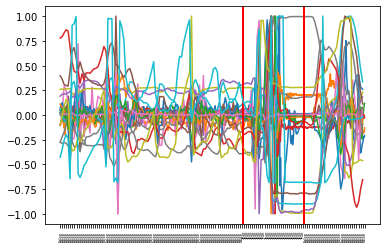

In [666]:
plt.clf()
plot_recording(recordings[0])

2600
13.0

4000
20.0

4000
20.0

4000
20.0

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01

202
1.01



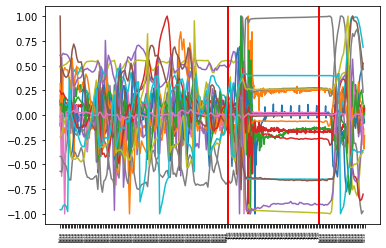

In [667]:
plt.clf()
plot_recording(recordings[1])

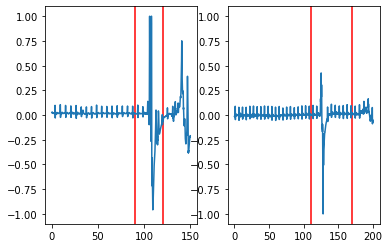

In [672]:
import math 
max_size = math.floor(len(recordings)/2)
fig, axs = plt.subplots(max_size, 2)
row = 0
col = 0

for r in recordings:
    if row != -1:
        data = r.p_ecg
        labels = r.labels
        
        mu = sum(data)/len(data)
        data = [el-mu for el in data]

        if abs(min(data)) > max(data):
            data = [el/abs(min(data)) for el in data]
        else:
            data = [el/max(data) for el in data]

        idxs = getFallIndexes(labels)
        
        if max_size:
            for idx in idxs:
                axs[col].plot([idx]*2, np.linspace(-2,2,2),color="red")

            axs[col].plot(np.arange(0, len(data))*len(labels)/len(data), data)
            axs[col].set_ylim(-1.1,1.1)
        else:
            for idx in idxs:
                axs[row, col].plot([idx]*2, np.linspace(-2,2,2),color="red")

            axs[row, col].plot(np.arange(0, len(data))*len(labels)/len(data), data)
            axs[row, col].set_ylim(-1.1,1.1)
    
    if col < 1:
        col += 1
    elif row < max_size-1:
        row += 1
        col = 0
    else:
        row = -1

1950
13.0



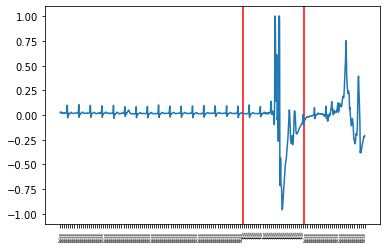

In [673]:
plot_time(recordings[0].p_ecg, recordings[0].labels)

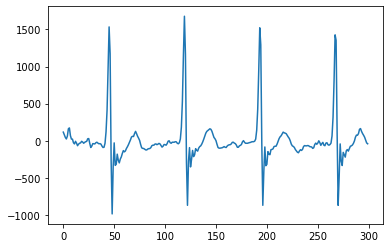

In [674]:
plt.plot(range(len(recordings[0].p_ecg))[0:300], recordings[0].p_ecg[0:300])

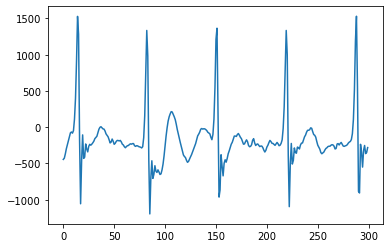

In [675]:
plt.plot(range(len(recordings[1].p_ecg))[0:300], recordings[1].p_ecg[0:300])